<a href="https://colab.research.google.com/github/7oda111/personalit-assesment-ML-vs.-NN-/blob/main/NN_semi_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 personality assesment 

personality assesment with a CNN network to evaluate the charaters on have through neural network applications . with the help of fully connected neurons 

this part of code connect colab libraries tto the gogle drivers folders so that the one can be able to import the nesscisary to be applied to with the CNN 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importing the nessisary libraries for the first part of the code , which is importing the dataset 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
%matplotlib inline

importing the dataset from google drive and maing a copy , so that the original one don't get damaged 

In [6]:
data_raw_train = pd.read_csv('/content/drive/MyDrive/dataset folder/trait_scoring_keys.csv')
data_train = data_raw_train.copy()

doing some data preprocessing thechniques like head method to see the first 10 raws in the dataset . 
another one is describe to find the main characters of the dataset like the mean , count, std('standard deviation')
the shape method is used to find the dimensios of the data set 

In [7]:
 data_train.head()

,id,full_position,short_position,sign,key,facet,item
0,1,1,1.0,+N1,N1,Anxiety,Worry about things.
1,2,2,2.0,+E1,E1,Friendliness,Make friends easily.
2,3,3,3.0,+O1,O1,Imagination,Have a vivid imagination.
3,4,4,4.0,+A1,A1,Trust,Trust others.
4,5,5,5.0,+C1,C1,Self-Efficacy,Complete tasks successfully.


In [9]:
data_train.describe()

,id,full_position,short_position
count,300.000000,300.000000,120.000000
mean,150.500000,150.500000,60.500000
std,86.746758,86.746758,34.785054
min,1.000000,1.000000,1.000000
25%,75.750000,75.750000,30.750000
50%,150.500000,150.500000,60.500000
75%,225.250000,225.250000,90.250000
max,300.000000,300.000000,120.000000


In [11]:
data_train.shape

(300, 7)

In [13]:
print('number of participants :' , len(data_train))

number of participants : 300


In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              300 non-null    int64  
 1   full_position   300 non-null    int64  
 2   short_position  120 non-null    float64
 3   sign            300 non-null    object 
 4   key             300 non-null    object 
 5   facet           300 non-null    object 
 6   item            300 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 16.5+ KB


here i am doing some data preprocessing to fill the null values that i descoveed in the dataset by the using the following commands


In [16]:
data_train.fillna(value=0)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              300 non-null    int64  
 1   full_position   300 non-null    int64  
 2   short_position  120 non-null    float64
 3   sign            300 non-null    object 
 4   key             300 non-null    object 
 5   facet           300 non-null    object 
 6   item            300 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 16.5+ KB


In [17]:
data_train.dropna(inplace=True)

In [18]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 289
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              120 non-null    int64  
 1   full_position   120 non-null    int64  
 2   short_position  120 non-null    float64
 3   sign            120 non-null    object 
 4   key             120 non-null    object 
 5   facet           120 non-null    object 
 6   item            120 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 7.5+ KB


**now come to the second part of the code ,visaulozing the attributes of the data set  **

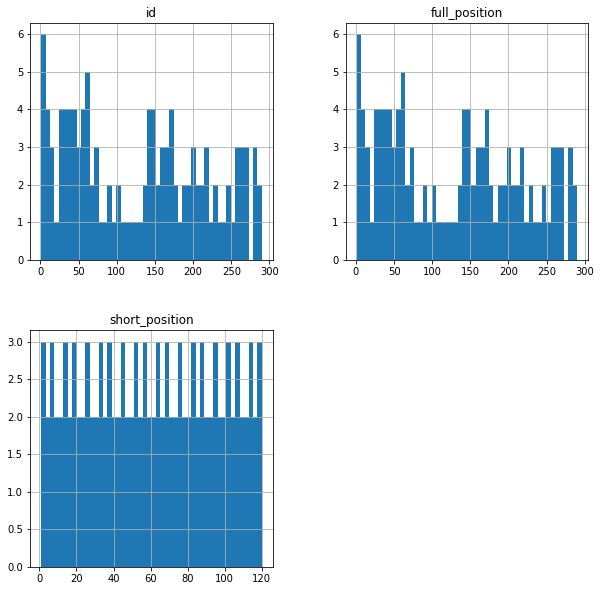

In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt 
data_train.hist(bins=50, figsize=(10,10))
plt.show()

In [22]:
data_train.columns

Index(['id', 'full_position', 'short_position', 'sign', 'key', 'facet',
       'item'],
      dtype='object')

*after i read the data set i was confused on how to train a neural network without a traing set , so i used an already split dataset divided into two paarts train , test -----> that was aleared split  *

In [24]:
x = pd.read_csv('/content/drive/MyDrive/dataset folder/mypersonality_train.csv',encoding='latin-1')

In [26]:
y = pd.read_csv('/content/drive/MyDrive/dataset folder/mypersonality_test.csv', encoding ='latin-1' )

doing  some data preprocessing thechniques to get to know the dataset 

In [27]:
x.head()

,X.AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,180,14861.6,93.29,0.03,15661,0.49,0.1
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,180,14861.6,93.29,0.03,15661,0.49,0.1
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,180,14861.6,93.29,0.03,15661,0.49,0.1
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,180,14861.6,93.29,0.03,15661,0.49,0.1
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,180,14861.6,93.29,0.03,15661,0.49,0.1


In [28]:
y.head()

,X.AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,172400f46880b309ca5e97d322bb8f01,"I have no excuses, least of all for God. Like...",3.45,2.85,2.8,2.7,4.15,n,y,n,n,y,07/15/09 11:19 PM,122.0,6529.3,89.94,0.07,6893.0,0.47,0.26
1,172400f46880b309ca5e97d322bb8f01,Back,3.45,2.85,2.8,2.7,4.15,n,y,n,n,y,07/14/09 12:27 PM,122.0,6529.3,89.94,0.07,6893.0,0.47,0.26
2,172400f46880b309ca5e97d322bb8f01,Rip open the diseased heart of a corporation a...,3.45,2.85,2.8,2.7,4.15,n,y,n,n,y,07/25/09 05:14 AM,122.0,6529.3,89.94,0.07,6893.0,0.47,0.26
3,172400f46880b309ca5e97d322bb8f01,You're wicked overseer,3.45,2.85,2.8,2.7,4.15,n,y,n,n,y,06/14/09 05:47 PM,122.0,6529.3,89.94,0.07,6893.0,0.47,0.26
4,172400f46880b309ca5e97d322bb8f01,"""Keep government away from my medicare!"" As g...",3.45,2.85,2.8,2.7,4.15,n,y,n,n,y,08/11/09 09:24 PM,122.0,6529.3,89.94,0.07,6893.0,0.47,0.26


In [29]:
x.describe

<bound method NDFrame.describe of                               X.AUTHID  ... TRANSITIVITY
0     b7b7764cfa1c523e4e93ab2a79a946c4  ...         0.10
1     b7b7764cfa1c523e4e93ab2a79a946c4  ...         0.10
2     b7b7764cfa1c523e4e93ab2a79a946c4  ...         0.10
3     b7b7764cfa1c523e4e93ab2a79a946c4  ...         0.10
4     b7b7764cfa1c523e4e93ab2a79a946c4  ...         0.10
...                                ...  ...          ...
7991  a764ca41dca158d7a191505dcc8ce47f  ...         0.12
7992  deb899e426c1a5c66c24eeb0d7df6257  ...         0.63
7993  deb899e426c1a5c66c24eeb0d7df6257  ...         0.63
7994  5532642937eb3497a43e15dbb23a9d2d  ...         0.05
7995  a286b7286b1247d4a7851709e9f31e1e  ...         0.13

[7996 rows x 20 columns]>

In [30]:
y.describe

<bound method NDFrame.describe of                               X.AUTHID  ... TRANSITIVITY
0     172400f46880b309ca5e97d322bb8f01  ...         0.26
1     172400f46880b309ca5e97d322bb8f01  ...         0.26
2     172400f46880b309ca5e97d322bb8f01  ...         0.26
3     172400f46880b309ca5e97d322bb8f01  ...         0.26
4     172400f46880b309ca5e97d322bb8f01  ...         0.26
...                                ...  ...          ...
1916  789ce9b31990354f0a5a507347844dea  ...         0.11
1917  789ce9b31990354f0a5a507347844dea  ...         0.11
1918  8974aab97d9fc4e3a53ba126b5eedd81  ...         0.11
1919  ea28a927cb6663480ea33ca917c3c8ba  ...         0.26
1920  ea28a927cb6663480ea33ca917c3c8ba  ...         0.26

[1921 rows x 20 columns]>

In [31]:
print("is there any missing value? ", x.isnull().values.any())

is there any missing value?  False


In [32]:
print("is there any missing value? ", y.isnull().values.any())

is there any missing value?  True


In [33]:
y.dropna(inplace=True)
print("is there any missing value? ", y.isnull().values.any())

is there any missing value?  False


In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X.AUTHID      7996 non-null   object 
 1   STATUS        7996 non-null   object 
 2   sEXT          7996 non-null   float64
 3   sNEU          7996 non-null   float64
 4   sAGR          7996 non-null   float64
 5   sCON          7996 non-null   float64
 6   sOPN          7996 non-null   float64
 7   cEXT          7996 non-null   object 
 8   cNEU          7996 non-null   object 
 9   cAGR          7996 non-null   object 
 10  cCON          7996 non-null   object 
 11  cOPN          7996 non-null   object 
 12  DATE          7996 non-null   object 
 13  NETWORKSIZE   7996 non-null   int64  
 14  BETWEENNESS   7996 non-null   float64
 15  NBETWEENNESS  7996 non-null   float64
 16  DENSITY       7996 non-null   float64
 17  BROKERAGE     7996 non-null   int64  
 18  NBROKERAGE    7996 non-null 

In [35]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 1920
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X.AUTHID      1920 non-null   object 
 1   STATUS        1920 non-null   object 
 2   sEXT          1920 non-null   float64
 3   sNEU          1920 non-null   float64
 4   sAGR          1920 non-null   float64
 5   sCON          1920 non-null   float64
 6   sOPN          1920 non-null   float64
 7   cEXT          1920 non-null   object 
 8   cNEU          1920 non-null   object 
 9   cAGR          1920 non-null   object 
 10  cCON          1920 non-null   object 
 11  cOPN          1920 non-null   object 
 12  DATE          1920 non-null   object 
 13  NETWORKSIZE   1920 non-null   float64
 14  BETWEENNESS   1920 non-null   float64
 15  NBETWEENNESS  1920 non-null   float64
 16  DENSITY       1920 non-null   float64
 17  BROKERAGE     1920 non-null   float64
 18  NBROKERAGE    1920 non-null 

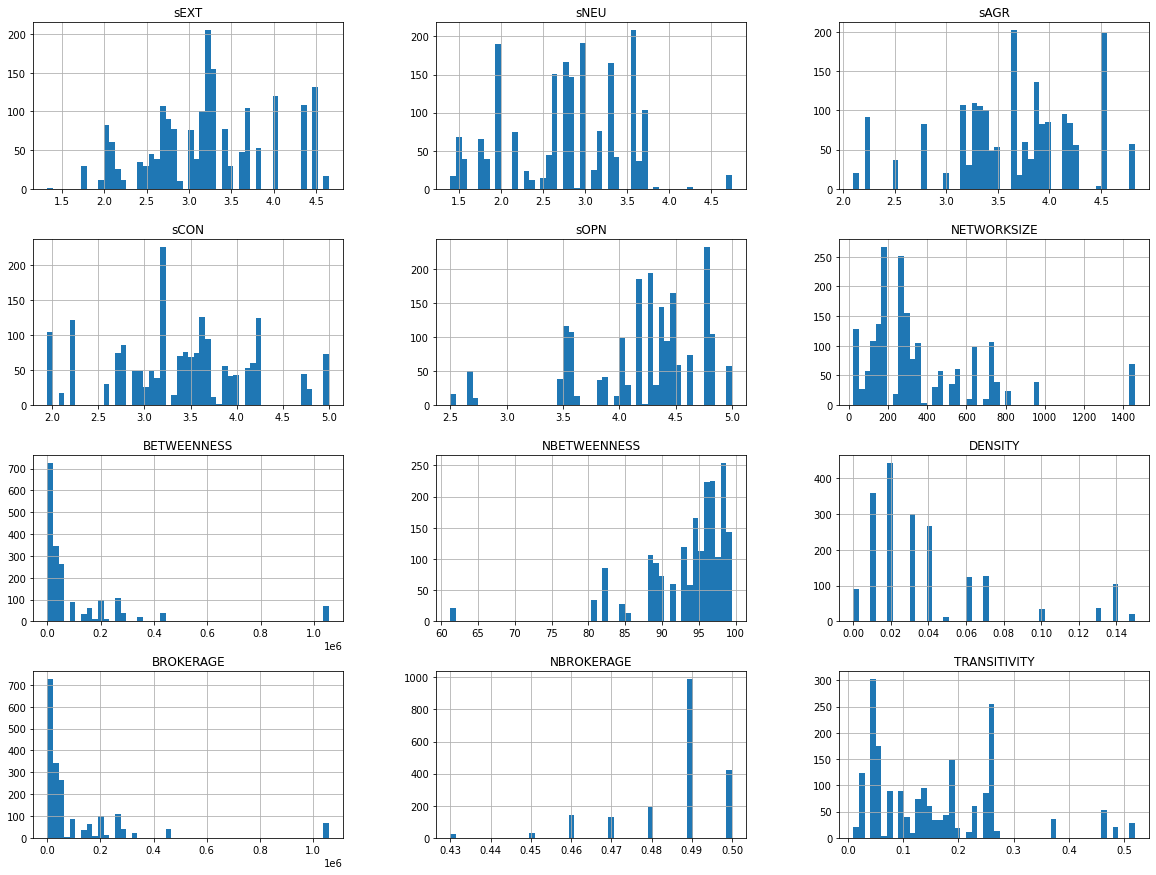

In [36]:
%matplotlib inline 
import matplotlib.pyplot as plt 
y.hist(bins=50, figsize=(20,15))
plt.show()

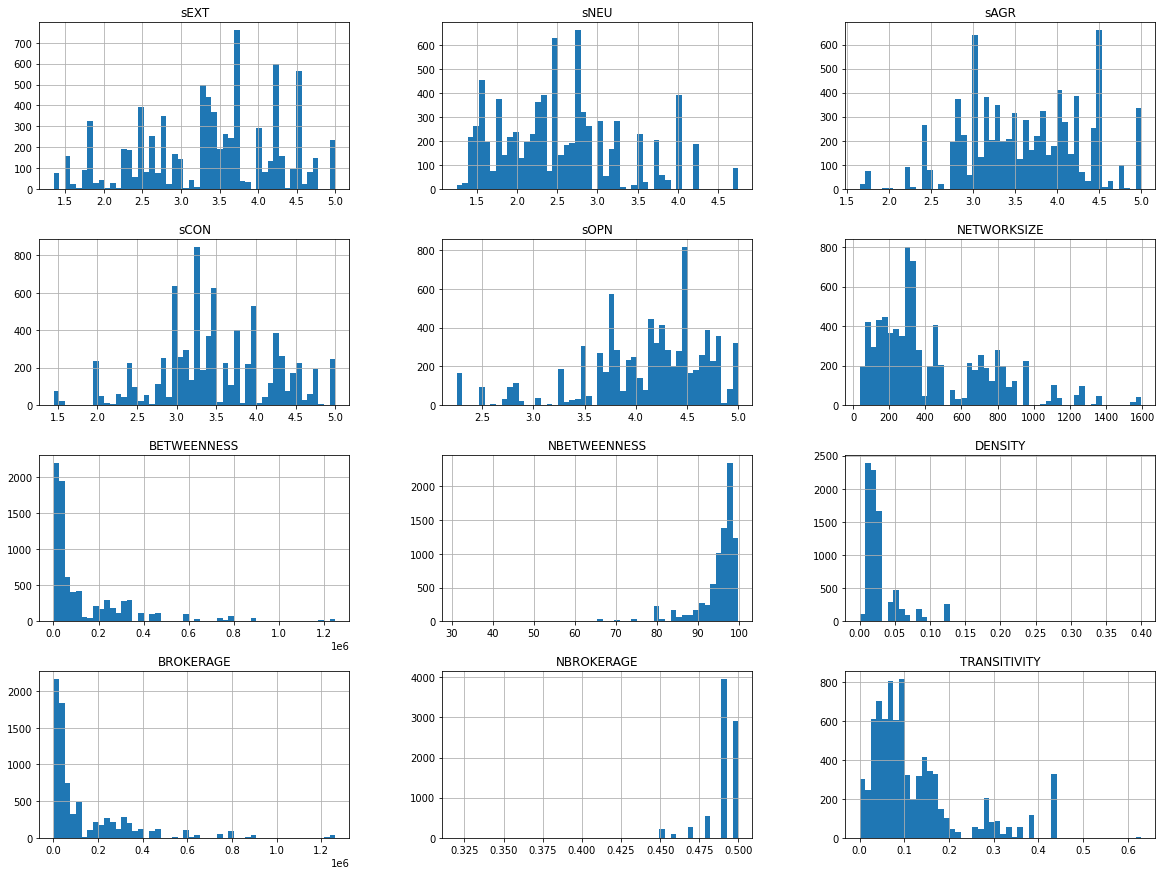

In [38]:
%matplotlib inline 
import matplotlib.pyplot as plt 
x.hist(bins=50, figsize=(20,15))
plt.show()

In [46]:
print('Training data shape')
x.shape

Training data shape


(7996, 20)

In [47]:
print('Test data shape')
y.shape

Test data shape


(1920, 20)

In [50]:
import numpy as np 

# after i read the data set i discovered some anomlies in the daaset likt some coulumns contain string and it's crossponding columns un the dataset are integers , so , after some research i decided to convert rhe string values 
# n---->0
# y---->1 

In [53]:
unique, counts = np.unique(str(y).split(), return_counts=True)

here i was supposed to find the unique values in the dataset to train every attribute to it's class 
as the convolution neural network way of running is to make a number of clases equal to the number layers in the network 

In [58]:
classes = y[['sEXT','sNEU','sAGR','sCON','cOPN']]
nClasses = len(classes)
print('Total number of outputs:', nClasses)
print('Output classes : ',classes)

Total number of outputs: 1920
Output classes :        sEXT  sNEU  sAGR  sCON cOPN
0     3.45  2.85  2.80  2.70    y
1     3.45  2.85  2.80  2.70    y
2     3.45  2.85  2.80  2.70    y
3     3.45  2.85  2.80  2.70    y
4     3.45  2.85  2.80  2.70    y
...    ...   ...   ...   ...  ...
1916  2.80  3.85  3.25  3.10    y
1917  2.80  3.85  3.25  3.10    y
1918  3.20  2.90  3.25  2.70    y
1919  4.05  3.35  3.80  3.95    y
1920  4.05  3.35  3.80  3.95    y

[1920 rows x 5 columns]


In [63]:
column_values = y['cEXT'].values

In [65]:
unique_values = np. unique(column_values)
print(unique_values)

['n' 'y']


In [69]:
y.cEXT[y.cEXT == 'y'] = 1
y.cEXT[y.cEXT == 'n'] = 0
print(y['cEXT'])

0       0
1       0
2       0
3       0
4       0
       ..
1916    0
1917    0
1918    0
1919    1
1920    1
Name: cEXT, Length: 1920, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


here i found aother way to repalce the character n the cloumns in the dataset to numbers 

In [72]:
y.replace({'1':'y', 0:'n'})
print(y)

                              X.AUTHID  ... TRANSITIVITY
0     172400f46880b309ca5e97d322bb8f01  ...         0.26
1     172400f46880b309ca5e97d322bb8f01  ...         0.26
2     172400f46880b309ca5e97d322bb8f01  ...         0.26
3     172400f46880b309ca5e97d322bb8f01  ...         0.26
4     172400f46880b309ca5e97d322bb8f01  ...         0.26
...                                ...  ...          ...
1916  789ce9b31990354f0a5a507347844dea  ...         0.11
1917  789ce9b31990354f0a5a507347844dea  ...         0.11
1918  8974aab97d9fc4e3a53ba126b5eedd81  ...         0.11
1919  ea28a927cb6663480ea33ca917c3c8ba  ...         0.26
1920  ea28a927cb6663480ea33ca917c3c8ba  ...         0.26

[1920 rows x 20 columns]


# the start of a interesting  part , creating the model  
# but first we have to shuffle the dataset so we can train our model without high bias , put first import test_train method 

In [42]:
from sklearn.model_selection import train_test_split

splitting the dataset into traing , testing with 5o:50 size for both training and testin

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, random_state=42)

In [ ]:
y-train = to_categorical(y_train)
y_test = to_categorical(y_test)

here is the most important part of the code creating the model with normal CNN method , using both 'relu,softmax' activation funtions , and using 'adam' optimizer to evaluate the model 
without forgetting to return the accuracy of the model by using 'Categorical_croosentropy'


In [ ]:
model = sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(64))
model.ad(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acuracy'])
model.fit(x_train,y_train,epochs=100, batch_size=8,verbose=1)

accuracy = moddel.evaluate(x_test,y_test)
print(accuracy)